In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/train-cleaned/train.csv")
train_df.head()

,Unnamed: 0,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


cluster_catgeory
1    24.413406
4    22.275957
6    21.859657
2    20.029976
3     6.316089
5     5.104915
Name: count, dtype: float64


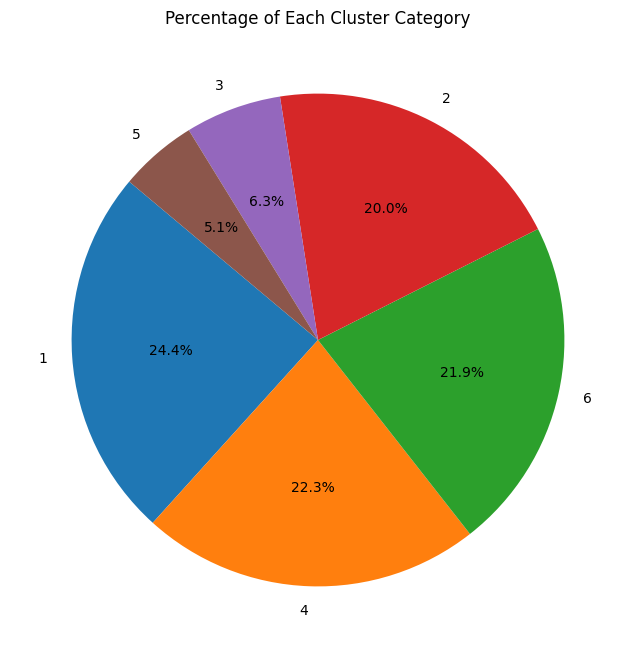

In [3]:
# Count the occurrences of each value in the 'cluster_category' column
value_counts = train_df['cluster_catgeory'].value_counts()

# Calculate the percentage of each value
percentages = (value_counts / len(train_df)) * 100

print(percentages)

plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Cluster Category')
plt.savefig('/kaggle/working/cluster_pie.eps', format='eps')
plt.show()

<Figure size 1000x600 with 0 Axes>

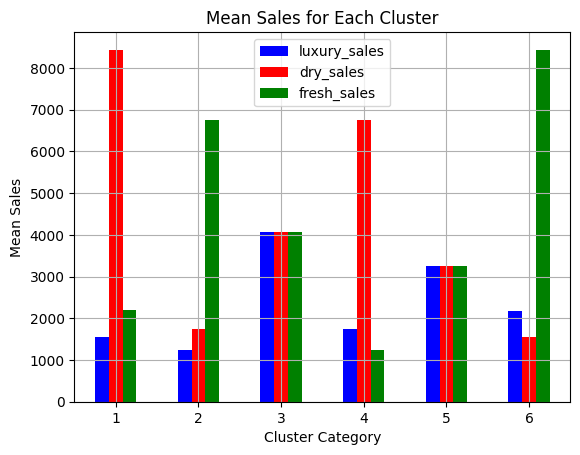

In [4]:
cluster_sales = train_df.groupby('cluster_catgeory')[['luxury_sales', 'dry_sales', 'fresh_sales']].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot grouped bar plot
cluster_sales.plot(kind='bar', color=['blue', 'red', 'green'])

# Adding labels and title
plt.xlabel('Cluster Category')
plt.ylabel('Mean Sales')
plt.title('Mean Sales for Each Cluster')

# Show plot
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.grid(True)
plt.savefig('/kaggle/working/sales_breakdown.eps', format='eps')

plt.show()

In [5]:
outlet_df01 = train_df.drop(['Customer_ID','cluster_catgeory'],axis=1)
outlet_means = outlet_df01.groupby('outlet_city').mean().reset_index()
outlet_means

,outlet_city,Unnamed: 0,luxury_sales,fresh_sales,dry_sales
0,Batticaloa,570844.513181,2127.743418,5026.247276,5053.765882
1,Colombo,570584.891441,2124.698008,5017.168054,5041.472089
2,Dehiwala-Mount Lavinia,183354.566522,1692.520215,3791.646543,4245.396367
3,Galle,570446.393200,2127.042306,5012.113018,5068.271006
4,Gampaha,570146.842015,2116.045148,4984.078629,5062.359434
5,Homagama,183435.787235,1698.857887,3783.230829,4257.187049
6,Jaffna,571111.605626,2124.635865,5019.506877,5044.076503
7,Kaduwela,182658.731367,1698.135657,3785.330274,4279.796143
8,Kalmunai,570755.660590,2114.645551,5009.454757,5039.390643
9,Kandy,570353.767469,2123.390270,5013.089463,5064.413423


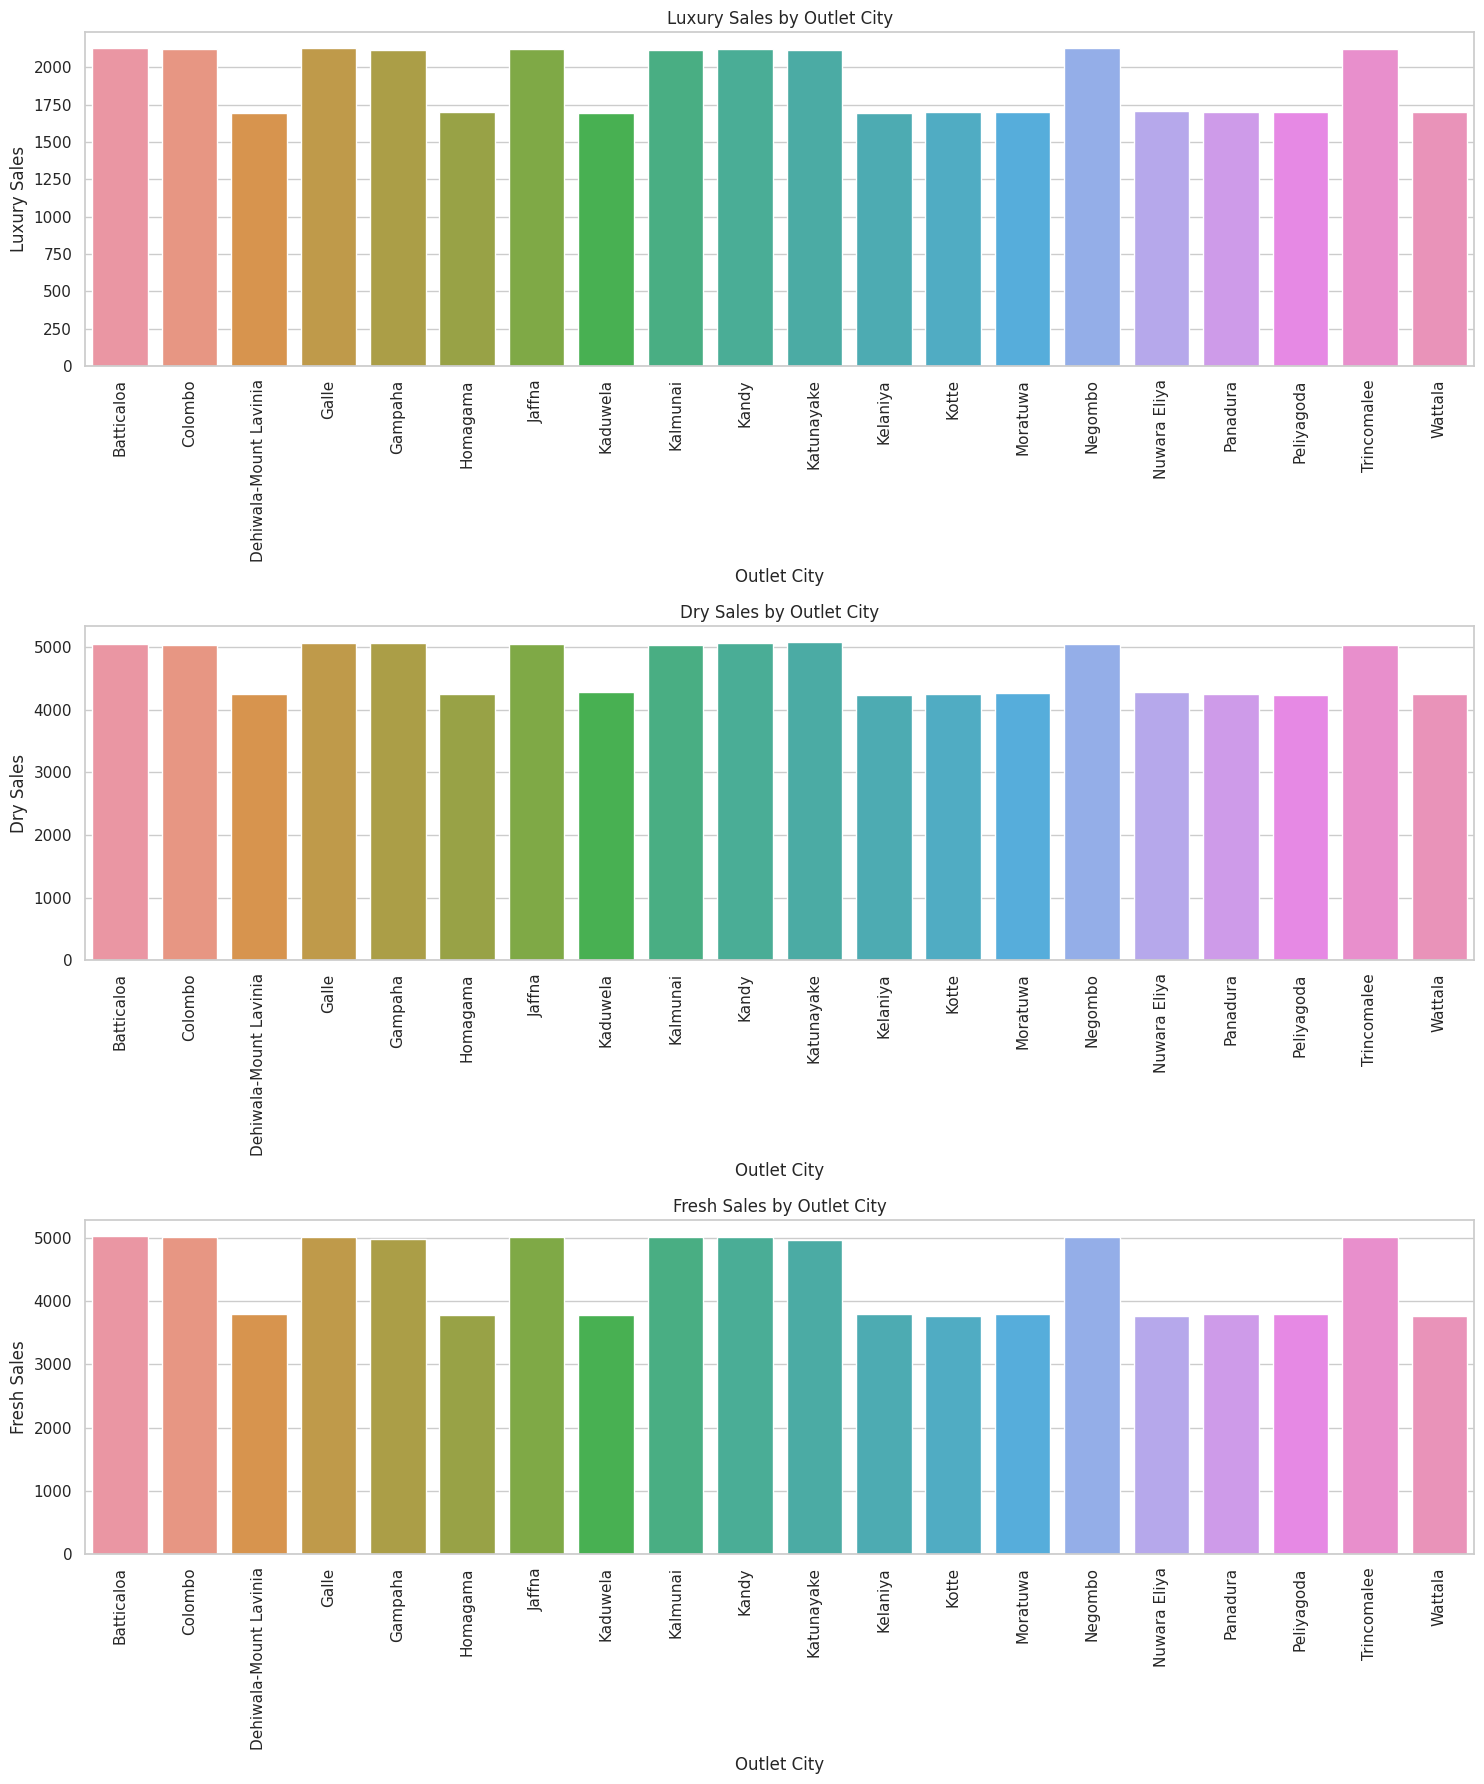

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Plotting the luxury sales for each city
sns.barplot(x='outlet_city', y='luxury_sales', data=outlet_means, ax=axes[0])
axes[0].set_title('Luxury Sales by Outlet City')
axes[0].set_xlabel('Outlet City')
axes[0].set_ylabel('Luxury Sales')
axes[0].tick_params(axis='x', rotation=90)

# Plotting the dry sales for each city
sns.barplot(x='outlet_city', y='dry_sales', data=outlet_means, ax=axes[1])
axes[1].set_title('Dry Sales by Outlet City')
axes[1].set_xlabel('Outlet City')
axes[1].set_ylabel('Dry Sales')
axes[1].tick_params(axis='x', rotation=90)

# Plotting the fresh sales for each city
sns.barplot(x='outlet_city', y='fresh_sales', data=outlet_means, ax=axes[2])
axes[2].set_title('Fresh Sales by Outlet City')
axes[2].set_xlabel('Outlet City')
axes[2].set_ylabel('Fresh Sales')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('/kaggle/working/city_breakdown.eps', format='eps')

# Display the plots
plt.show()

In [7]:
Urban_outlets = ['Batticaloa', 'Colombo', 'Jaffna', 'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo', 'Trincomalee', 'Kandy', 'Anuradhapura']
Suburban_outlets = ['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama', 'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda', 'Kotte', 'Nuwara Eliya', 'Madawachiya']
urban_df = train_df[train_df['outlet_city'].isin(Urban_outlets)]
suburban_df = train_df[train_df['outlet_city'].isin(Suburban_outlets)]

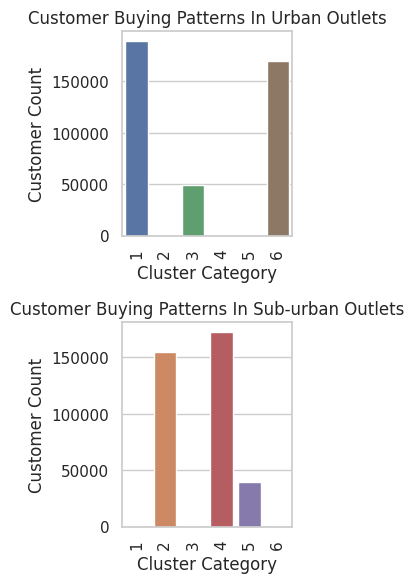

In [9]:
urban_sales = urban_df.groupby('cluster_catgeory')[['luxury_sales', 'dry_sales', 'fresh_sales']].count().reset_index()
suburban_sales = suburban_df.groupby('cluster_catgeory')[['luxury_sales', 'dry_sales', 'fresh_sales']].count().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(3, 6))

# Plotting the luxury sales for each city
sns.barplot(x='cluster_catgeory', y='luxury_sales', data=urban_sales, ax=axes[0])
axes[0].set_title('Customer Buying Patterns In Urban Outlets')
axes[0].set_xlabel('Cluster Category')
axes[0].set_ylabel('Customer Count')
axes[0].tick_params(axis='x', rotation=90)

# Plotting the dry sales for each city
sns.barplot(x='cluster_catgeory', y='luxury_sales', data=suburban_sales, ax=axes[1])
axes[1].set_title('Customer Buying Patterns In Sub-urban Outlets')
axes[1].set_xlabel('Cluster Category')
axes[1].set_ylabel('Customer Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('/kaggle/working/city_breakdown.eps', format='eps')

# Display the plots
plt.show()

In [10]:
# Group by outlet city column and cluster category column
grouped = train_df.groupby(['outlet_city','cluster_catgeory']).size().unstack(fill_value=0)

# Calculate the percentage of each cluster category within each outlet city
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentage

cluster_catgeory,1,2,3,4,5,6
outlet_city,,,,,,
Batticaloa,46.231131,0.002439,11.949179,0.000000,0.004877,41.812373
Colombo,46.361442,0.000000,12.082206,0.000000,0.004876,41.551476
Dehiwala-Mount Lavinia,0.002715,42.484388,0.000000,46.918273,10.589194,0.005430
Galle,46.425348,0.000000,12.025270,0.000000,0.000000,41.549382
Gampaha,46.615140,0.000000,12.001093,0.000000,0.000000,41.383767
Homagama,0.005460,42.208998,0.000000,47.005351,10.780192,0.000000
Jaffna,46.280768,0.002459,12.058918,0.002459,0.002459,41.652937
Kaduwela,0.002726,42.181451,0.002726,47.317485,10.495611,0.000000
Kalmunai,46.313540,0.002457,11.863990,0.000000,0.000000,41.820013
